In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [129]:
file_path = r'C:\Users\valan\Desktop\data.csv'

df = pd.read_csv(file_path, encoding='latin1')

In [130]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [131]:
negative_quantity_indices = df[df['Quantity'] < 0].index
print(negative_quantity_indices)

Index([   141,    154,    235,    236,    237,    238,    239,    240,    241,
          939,
       ...
       540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715, 541716,
       541717],
      dtype='int64', length=10624)


In [132]:
df = df.drop(index = negative_quantity_indices)

In [133]:
product_quantity= df.groupby('Description')['Quantity'].sum()

In [134]:
sorted_pq = df.sort_values(by = "Quantity", ascending=False).head()

print(sorted_pq)

       InvoiceNo StockCode                        Description  Quantity  \
540421    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826     ASSTD DESIGN 3D PAPER STICKERS     12540   
74614     542504     37413                                NaN      5568   
421632    573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   

             InvoiceDate  UnitPrice  CustomerID         Country  
540421    12/9/2011 9:15       2.08     16446.0  United Kingdom  
61619    1/18/2011 10:01       1.04     12346.0  United Kingdom  
502122  11/25/2011 15:57       0.00     13256.0  United Kingdom  
74614    1/28/2011 12:03       0.00         NaN  United Kingdom  
421632  10/27/2011 12:26       0.21     12901.0  United Kingdom  


In [135]:
unit_price = df.groupby('Description')[['Quantity','UnitPrice']].sum()

In [136]:
max_unitp = df['UnitPrice'].max()

In [137]:
max_row = df[df['UnitPrice'] == max_unitp]

In [138]:
max_row[['Description', 'Quantity', 'UnitPrice']]

,Description,Quantity,UnitPrice
15017,AMAZON FEE,1,13541.33


In [139]:
cust_id = df.groupby('CustomerID')['Quantity'].sum().head()

In [140]:
print(cust_id)

CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
Name: Quantity, dtype: int64


In [141]:
sorted_customers = cust_id.sort_values(ascending=False)

In [142]:
print(sorted_customers)

CustomerID
12346.0    74215
12347.0     2458
12348.0     2341
12349.0      631
12350.0      197
Name: Quantity, dtype: int64


In [143]:
customer_top_order = sorted_customers.index[0]
customer_order_details = df[df['CustomerID'] == customer_top_order]

In [144]:
cust_sort = customer_order_details.sort_values(by = 'Quantity',ascending=False)

In [145]:
print(cust_sort)

      InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

           InvoiceDate  UnitPrice  CustomerID         Country  
61619  1/18/2011 10:01       1.04     12346.0  United Kingdom  


In [146]:
country_counts = df['Country'].value_counts().head()

In [147]:
print(country_counts)

Country
United Kingdom    486286
Germany             9042
France              8408
EIRE                7894
Spain               2485
Name: count, dtype: int64


In [148]:
total_revenue = (df['Quantity'] * df['UnitPrice'].sum())
print(f"Toplam Gelir: {total_revenue}")

Toplam Gelir: 0         1.229594e+07
1         1.229594e+07
2         1.639459e+07
3         1.229594e+07
4         1.229594e+07
              ...     
541904    2.459188e+07
541905    1.229594e+07
541906    8.197295e+06
541907    8.197295e+06
541908    6.147971e+06
Name: Quantity, Length: 531285, dtype: float64


In [149]:
En yüksek gelir hangi ürünle elde edilmiştir?


Object `edilmiştir` not found.


In [150]:
df['TotalRevenue'] = df["Quantity"]*df["UnitPrice"]

In [151]:
grouped_revenue = df.groupby("Description")["TotalRevenue"].sum()

In [152]:
sorted_revenue = grouped_revenue.sort_values(ascending=False)
print(sorted_revenue)

Description
DOTCOM POSTAGE                         206248.77
REGENCY CAKESTAND 3 TIER               174484.74
PAPER CRAFT , LITTLE BIRDIE            168469.60
WHITE HANGING HEART T-LIGHT HOLDER     106292.77
PARTY BUNTING                           99504.33
                                         ...    
allocate stock for dotcom orders ta         0.00
amazon                                      0.00
amazon adjust                               0.00
wrongly sold (22719) barcode                0.00
Adjust bad debt                        -11062.06
Name: TotalRevenue, Length: 4077, dtype: float64


In [153]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [154]:
late_date = df.sort_values(by = 'InvoiceDate', ascending=True)

In [155]:
print(late_date)

       InvoiceNo StockCode                          Description  Quantity  \
50829     540561    47567B               TEA TIME KITCHEN APRON         3   
50831     540561     22743   MAKE YOUR OWN FLOWERPOWER CARD KIT         6   
50830     540561     84581      DOG TOY WITH PINK CROCHET SKIRT         4   
50827     540561     85059            FRENCH ENAMEL WATER BASIN        16   
50826     540561     20712           JUMBO BAG WOODLAND ANIMALS        10   
...          ...       ...                                  ...       ...   
332549    566079     20838        FRENCH LATTICE CUSHION COVER         12   
332550    566079     22400    MAGNETS PACK OF 4 HOME SWEET HOME        24   
332551    566079     22396        MAGNETS PACK OF 4 RETRO PHOTO        24   
332544    566079     23403        LETTER HOLDER HOME SWEET HOME         4   
332571    566079     22923  FRIDGE MAGNETS LES ENFANTS ASSORTED        24   

            InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenu

In [156]:
late_date.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
50829,540561,47567B,TEA TIME KITCHEN APRON,3,1/10/2011 10:32,5.95,13004.0,United Kingdom,17.85


In [158]:
early_date = df.sort_values(by = 'InvoiceDate', ascending=False).head(1)

In [160]:
early_date

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
332571,566079,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,24,9/9/2011 9:52,0.85,17593.0,United Kingdom,20.4


In [182]:
unique_products_per_invoice = df.groupby('InvoiceNo')['StockCode'].nunique().idxmax()

In [183]:
print("Her faturada sipariş edilen toplam benzersiz ürün sayısı:")
print(unique_products_per_invoice)

Her faturada sipariş edilen toplam benzersiz ürün sayısı:
573585


In [200]:
desc_group = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

In [201]:
desc_group

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
Name: Quantity, dtype: int64

In [206]:
colors = ['skyblue', 'orange', 'lightgreen', 'red'] 

<Axes: ylabel='Description'>

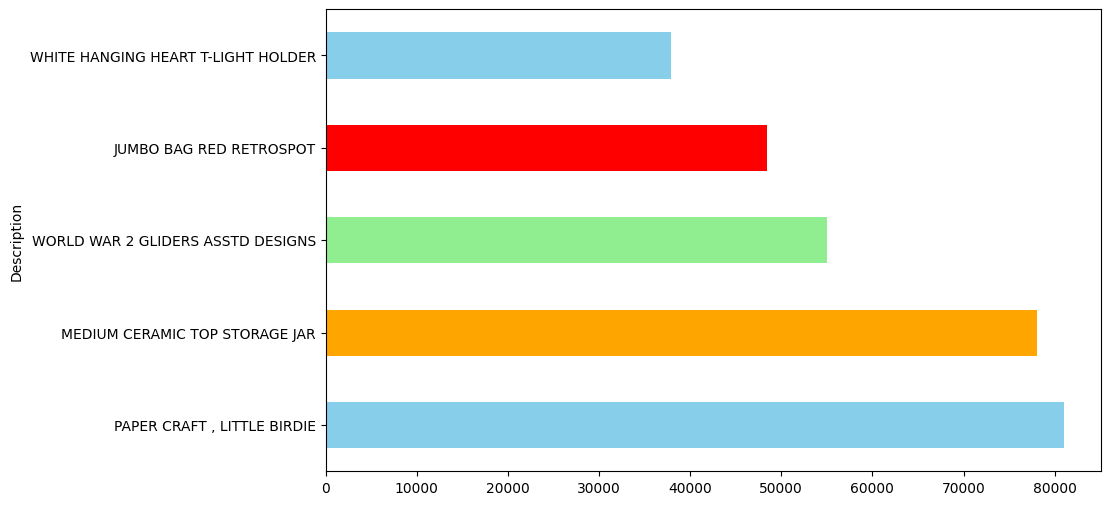

In [210]:
desc_group.plot(x='Description', y= 'Quantity', kind='barh',figsize=(10, 6), color=colors, legend=False)

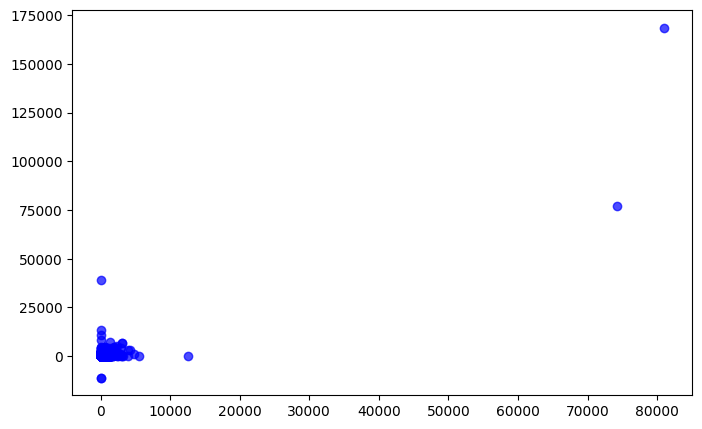

In [212]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['TotalRevenue'], color= 'blue', alpha=0.7)
plt.show()

In [ ]:
Soru: Hangi ürünler en fazla geliri getirmiştir?


In [216]:
desc_total = df.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

desc_total

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
Name: TotalRevenue, dtype: float64

<Axes: ylabel='Description'>

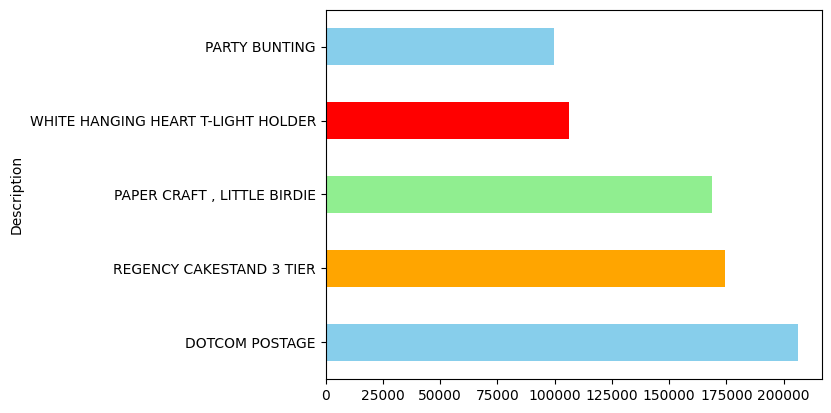

In [221]:
desc_total.plot(x='Description', kind = 'barh', color=colors)